# 交流电基本知识

基本元器件：

- 电阻
- 电感
- 电容

三个功率：

- 有功功率
- 无功功率
- 视在功率

> 交流电(Alternating Current, AC), 指的是电压源方向的变化。如果只是大小变化，但方向不变，仍然称为直流电。

工频交流电的频率为`50Hz`，有效值为`220V`。

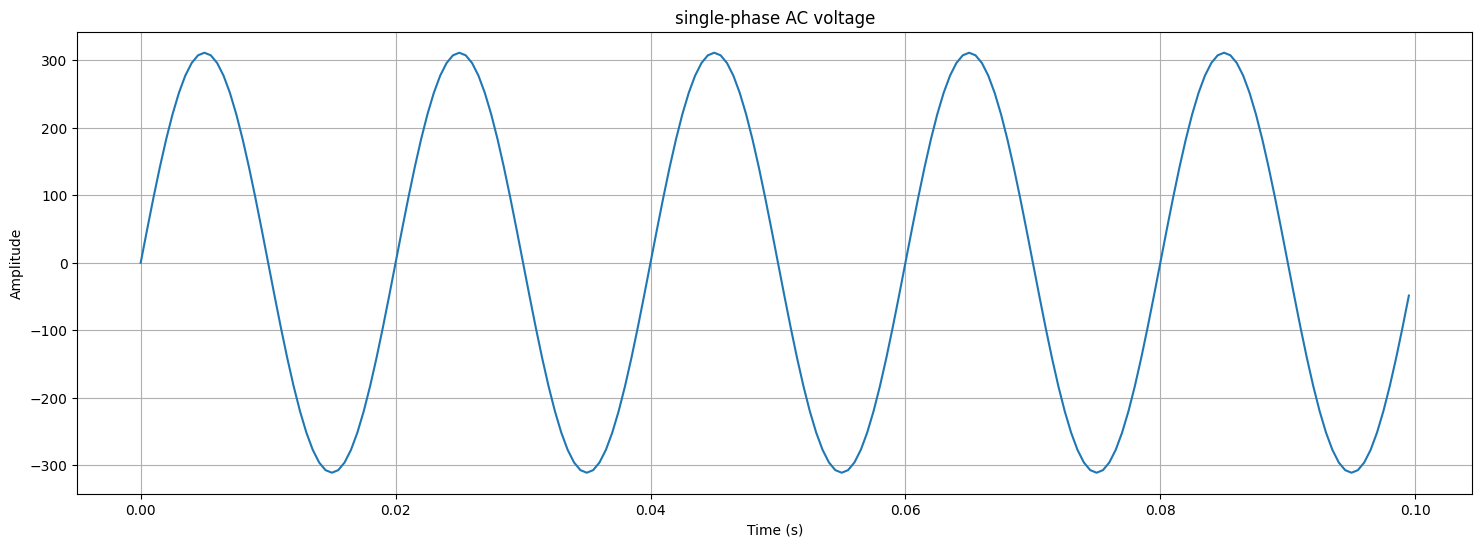

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 工频信号
f = 50
sampling_rate = 2000
T = 0.1
t = np.arange(0, T, 1/sampling_rate)
A = 220*np.sqrt(2)
w = 2 * np.pi * f
u = A*np.sin(w * t)

# 绘制信号
plt.figure(figsize=(18, 6))
plt.plot(t, u)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('single-phase AC voltage')
plt.grid(True)
plt.show()

## 负载

当电压源未接入负载时，电动势是存在的，但电流并不存在。而当电压源接入负载时，机会产生电流。

最简单的负载是电阻。因此我们先从电阻开始。

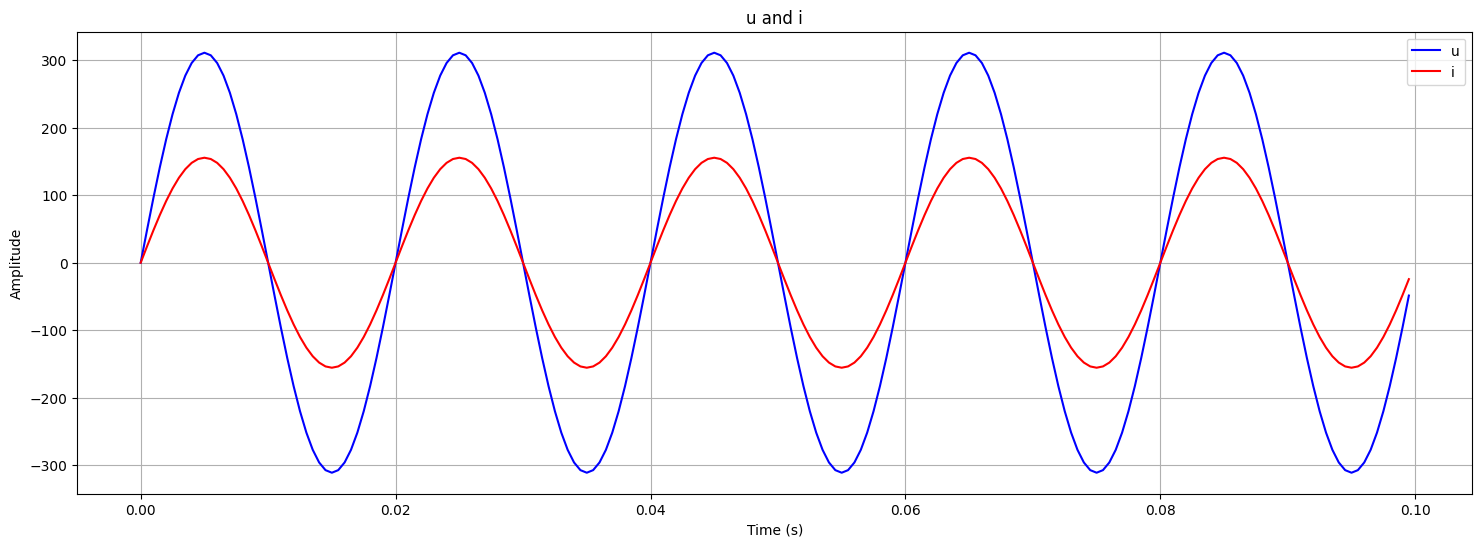

In [9]:
R = 2   # ohms
i = u / R    # Amps

# plt u and i
fig = plt.figure(figsize= (18, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, u, 'b-', label='u')
ax.plot(t, i, 'r-', label='i')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('u and i')
ax.grid(True)
plt.legend()

plt.show()

## 功率的计算

> 定义：一般是指一个周期内的平均功率。

- 有功功率（$P$）是交流电在一个周期内所做的功的平均值，它表示了实际消耗或转换的功率。
- 无功功率（$Q$）则用于表示交流电源与负载之间能量交换的振幅，它并不真正做功，而是反映了电源与负载之间的能量交换情况。无功功率的存在是由于负载中的电感和电容元件造成的，它们会储存和释放能量，但并不消耗能量。
- 视在功率（$S$）则是交流电源所能提供的总功率，它包括了有功功率和无功功率两部分。视在功率的大小等于电流有效值与电压有效值的乘积，它反映了电源的供电能力。

有功功率、无功功率和视在功率之间符合：
$$
S^2 = P^2 + Q^2
$$

P = 24.2 kW


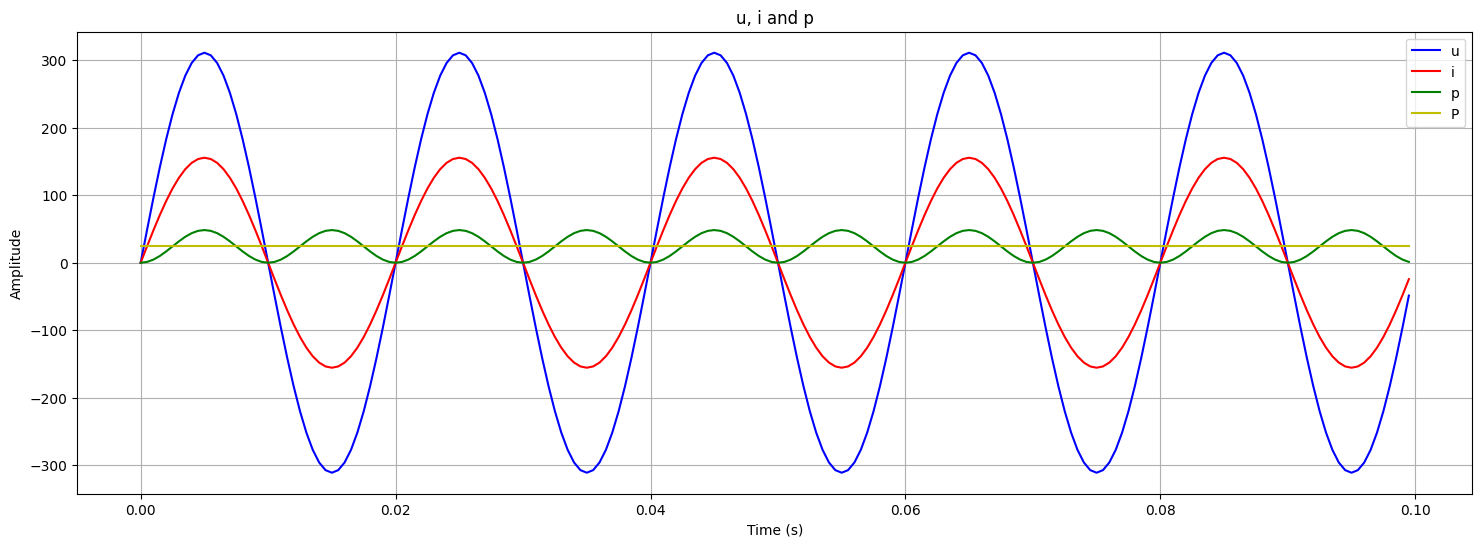

In [14]:
p = u * i / 1000

sqrt2 = np.sqrt(2)
P = np.max(u)/sqrt2 * np.max(i)/sqrt2 / 1000
print(f"P = {P} kW")
P = np.ones_like(u) * P

# plt u, i an p
fig = plt.figure(figsize= (18, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, u, 'b-', label='u')
ax.plot(t, i, 'r-', label='i')
ax.plot(t, p, 'g-', label='p')
ax.plot(t, P, 'y-', label='P')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('u, i and p')
ax.grid(True)
plt.legend()
plt.show()

## 电容

定义式：

$$
Q=CV
$$

上式的意义是，在一个具有C法拉的电容两端跨接V伏的电压时，该电容的一个极板上就有Q库仑的电荷存储，而在另一个极板上也有-Q库仑的电荷存储。

对上式两边取导数，有：

$$
I=C\frac{\text{d}V}{\text{d}t}
$$


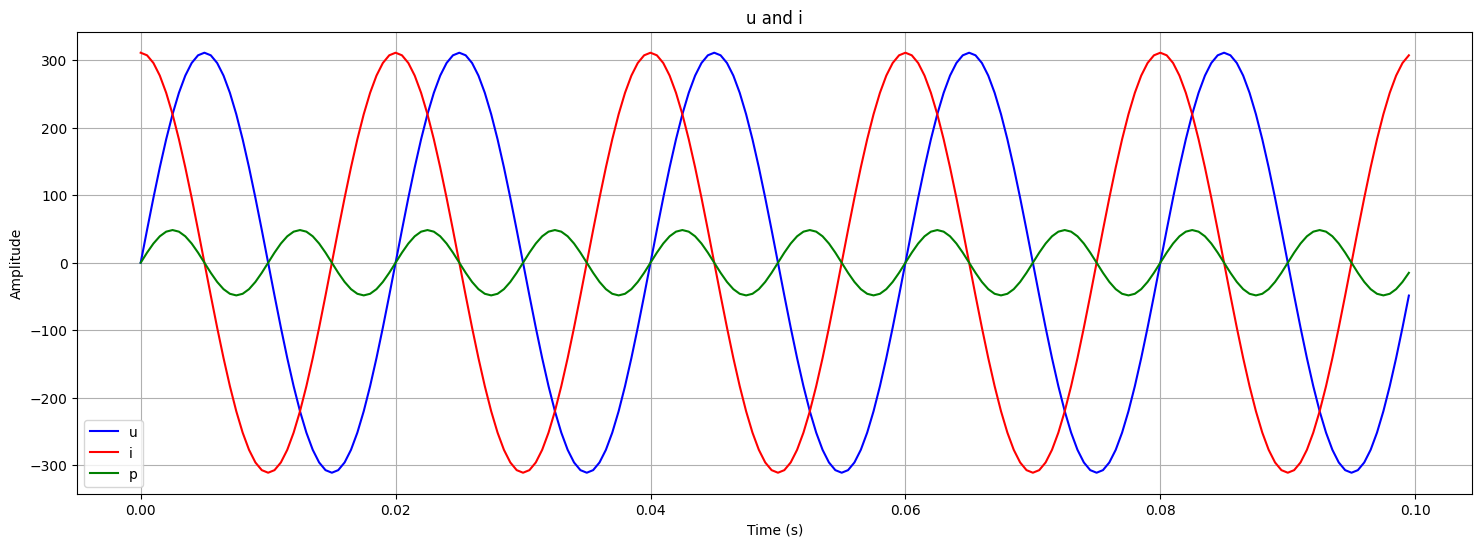

In [20]:
C = 1  # F
i = C * A * np.cos(w*t)
p = u * i / 1000

# plot u and i and p
fig = plt.figure(figsize= (18, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, u, 'b-', label='u')
ax.plot(t, i, 'r-', label='i')
ax.plot(t, p, 'g-', label='p')
ax.grid(True)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('u and i')
plt.legend()
plt.show()

## 电感

<video src="https://ikong-assets.oss-cn-hangzhou.aliyuncs.com/video/electronics/inductance-explanation.mp4" controls></video>

电感**定义**为：**每单位电流产生磁通的比值**。

计算典型几何形状的总磁通量是一个困难问题。实际可行的计算电感的方法是[法拉第定律](https://en.wikipedia.org/wiki/Faraday%27s_law_of_induction)。从法拉第定律出发，即可推导出：
$$
V=n^2Ak\mu_0\frac{\text dI}{\text dt}=L\frac{\text dI}{\text dt}
$$
其中

- n为线圈匝数
- A为线圈截面积
- k为与线圈几何形状相关的系数
- $\mu_0$为真空磁导率

式(2)表明，如果电压V=1V，对于1H的电感，电流以1A/s的速率上升。亨利是电感中较大的单位，电路中典型的电感范围从几微亨到几毫亨。

电感中的电流变化率取决于它两端所加的电压，而电容中的电压变化率则依赖于流过它的电流。电感的定义式是：
$$
V=L\frac{\text{d}I}{\text{d}t}
$$

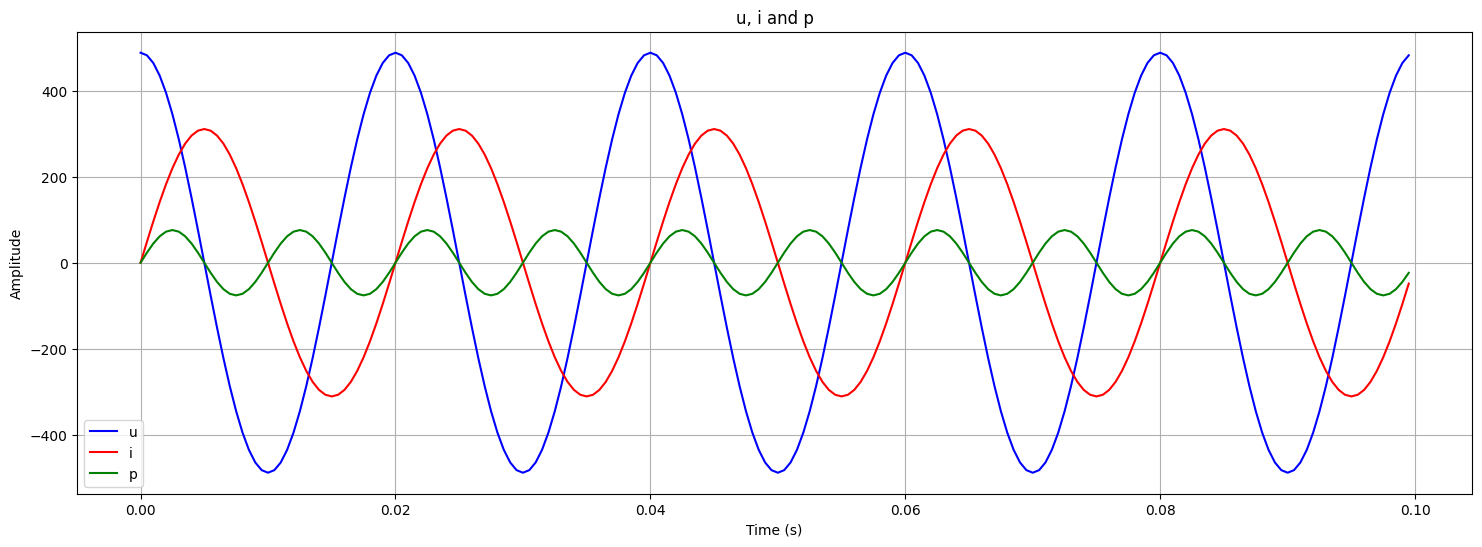

In [27]:
L = 0.005   # H
i = A * np.sin(w * t)
u = L * A * np.cos(w * t) * w
p = u * i / 1000

# plot u, i and p
fig = plt.figure(figsize= (18, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, u, 'b-', label='u')
ax.plot(t, i, 'r-', label='i')
ax.plot(t, p, 'g-', label='p')
ax.grid(True)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('u, i and p')
plt.legend()
plt.show()